Copyright (c) Meta Platforms, Inc. and its affiliates.  
  
This source code is licensed under the MIT license found in the LICENSE file in the root directory of this source tree.

## <font color='blue'>**Index:** </font>
- [Overview of the Notebook](#overview-notebook)
    - Prerequisites
    - Passing Arguments
- [Import necessary python packages](#import-python-packages)
- [Environment Setup:](#env-setup)
    - [Setting up environment on WINDOWS machine](#Setting-up-environment-on-WINDOWS-machine)
    - [Setting up environment on LINUX machine](#Setting-up-environment-on-LINUX-machine)
    - [Setting up environment on MAC](#Setting-up-environment-on-MAC)
- Demo Script
    - Provision API
    - Get Data
    - Robyn Inputs
    - Robyn Run
    - Robyn Outputs

## Overview of the Notebook <a class="anchor" id="overview-notebook"></a>

This notebook serves as a guide to interact with the Robyn API using Python. It takes inspiration from the demo file provided by Robyn and maintains a similar structure.

### Prerequisites

To successfully execute this notebook, the following setup is required:

- R must be installed on your system.
- The following R libraries should be installed: `arrow`, `dplyr`, `ggplot2`, `jsonlite`, `plumber`, and `tibble`.
- `Robyn` R library must be installed from the `robyn_api` branch on GitHub with the command:
  ```R
  remotes::install_github("facebookexperimental/Robyn/R", ref = "robyn-api", force = TRUE)
  ```
- `Nevergrad` optimization library should also be installed.  
Guide: https://github.com/facebookexperimental/Robyn/blob/main/demo/install_nevergrad.R
   

Please note that this notebook is intended to be run in the same directory where `robynapi_call.R` and `robynapi_endpoints.R` are located.

### Passing Arguments to Robyn API Functions

The Robyn API accepts arguments in the following categories:

1. **Data Frames**: These are the input datasets like training data, holiday data, and calibration data.
2. **Robyn Array Objects**: Objects such as `InputCollect`, `OutputModels`, and `OutputCollects` created within Robyn.
3. **Simple Strings or Arrays**: These include arguments like `dep_var`, `select_model`, `adstock`, `paid_media_vars`, etc.

### Steps to Invoke the API:

1. Initialize the arguments from category 3 within a dictionary object named `xxxArgs`.
2. Prepare the payload by defining the data from categories 1, 2, and 3.
3. Use the `requests` library in Python to make the API call with the payload.

### <font color='green'>Import necessary python packages</font> <a class="anchor" id="import-python-packages"></a>

In [1]:
import pandas as pd
import json
import requests
import json
import binascii
import io
import pandas as pd
import os
import sys
import subprocess
from urllib.request import urlopen
from bs4 import BeautifulSoup
from PIL import Image
from IPython.display import display

In [2]:
from python_helper import *

# Set to FALSE to avoid the creation of files locally
create_files = True

# Set directory to export robyn outputs
robyn_directory = 'C:/Users/ebyjose/RobynOutcomes/'

### <font color='green'>Environment Setup</font> <a class="anchor" id="env-setup"></a>

#### Setting up environment on WINDOWS machine <a class="anchor" id="Setting-up-environment-on-WINDOWS-machine"></a>

#### Barebones command to run RobynAPI -> <font color='red'> ! START "" /B "<path_where_R_is_installed>\Rscript.exe" "<path_where_robyn_api_files_exist>\robynapi_call.R" 1>path_to_logfile.txt 2>& </font>
1. Find location where R is installed on your machine. If the location is "C:\Program Files\R\R-4.2.2\bin\" Then use this to replace <path_where_R_is_installed>
2. Find where api files exist and replace it with <path_where_robyn_api_files_exist>
    e.g. ! START "" /B "C:\Program Files\R\R-4.2.2\bin\Rscript.exe" "C:\Documents\GitHub\robyn\robyn_api\robynapi_call.R"

#### To kill the API enter the following command in terminal netstat -aon | find /i "listening" |find "9999"
or enter the following command in a jupyter cell:  ! netstat -aon | find /i "listening" |find "9999"
1. Follow the last text from the output - this is the process id
2. Enter process id in the next cell and press enter

In [ ]:
! START "" /B "C:/Program Files/R/R-4.2.2/bin/Rscript.exe" "C:/Users/ebyjose/OneDrive - Facebook/Documents/GitHub/robyn/robyn_api/robynapi_call.R" 1>C:/Users/ebyjose/Robynlog.txt 2>&1

In [52]:
#to find the endpoint running plumber
! netstat -aon | find /i "listening" |find "9999"

  TCP    127.0.0.1:9999         0.0.0.0:0              LISTENING       41356


In [53]:
# to close the API in windows
endpoint = 41356
subprocess.call(['taskkill', '/F', '/T', '/PID',  str(endpoint)])

0

#### Steps to run RobynAPI if you are using a <u> LINUX </u> machine/server <a class="anchor" id="Setting-up-environment-on-LINUX-machine"></a>

#### Barebones command to run RobynAPI -> <font color='red'> ! Rscript <path_where_robyn_api_files_exist>\robynapi_call.R &</font>
1. Find location where R is installed on your machine. If the location is "C:\Program Files\R\R-4.2.2\bin\" Then use this to replace <path_where_R_is_installed>
2. Find where api files exist and replace it with <path_where_robyn_api_files_exist>
    
    e.g. # ! Rscript /home/robyn/robyn_api/api-call.R

In [ ]:
! Rscript <path_to_apifile>/robynapi_call.R &

#### Steps to run RobynAPI if you are using a <u> MAC </u> <a class="anchor" id="Setting-up-environment-on-MAC"></a>

#### Barebones command to run RobynAPI -> <font color='red'> subprocess.Popen(["Rscript", "<path_to_apifile>/api_call.R"])</font>
1. Find where api files exist and replace it with <path_to_apifile>
    
    e.g. # subprocess.Popen(["Rscript", "/home/robyn/robyn_api/robynapi_call.R"])

In [ ]:
p = subprocess.Popen(["Rscript", "./robynapi_call.R"])

In [ ]:
# p.kill()

# <font color='green'>Demo Script</font>

In [4]:
apiBaseUrl = "http://127.0.0.1:9999/{}"

In [5]:
url = apiBaseUrl[:-3]+"/openapi.json"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")
apis = json.loads(soup.contents[0])
for i in apis['paths'].keys():
    print(apiBaseUrl.format(i[1:]))

http://127.0.0.1:9999/robyn_version
http://127.0.0.1:9999/dt_simulated_weekly
http://127.0.0.1:9999/dt_prophet_holidays
http://127.0.0.1:9999/robyn_inputs
http://127.0.0.1:9999/robyn_run
http://127.0.0.1:9999/robyn_outputs
http://127.0.0.1:9999/robyn_onepagers
http://127.0.0.1:9999/robyn_allocator
http://127.0.0.1:9999/robyn_write
http://127.0.0.1:9999/robyn_recreate
http://127.0.0.1:9999/hyper_names


## Step 0: Setup environment
Check the version of Robyn

In [6]:
robyn_api('robyn_version')

['3.10.5.9001']

## Step 1: Load data
Check simulated dataset or load your own dataset

In [7]:
dt_simulated_weekly = pandas_builder(robyn_api('dt_simulated_weekly'))
dt_simulated_weekly.head()

,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
0,2015-11-23,2.754372e+06,67075.04,0.0,38185.4667,7.290385e+07,0.0000,0,8125009,22821.3987,na,19401.6538
1,2015-11-30,2.584277e+06,85840.36,0.0,0.0000,1.658110e+07,29511.7155,12400,7901549,3425.8574,na,14791.0000
2,2015-12-07,2.547387e+06,0.00,396835.2,1361.6000,4.995477e+07,36132.3590,11360,8300197,12769.1261,na,14544.0000
3,2015-12-14,2.875220e+06,250350.92,0.0,53040.0000,3.164930e+07,36804.2110,12760,8122883,8401.4720,na,2800.0000
4,2015-12-21,2.215953e+06,0.00,832008.0,0.0000,8.802269e+06,28401.7441,10840,7105985,2068.7478,na,15478.0000


Check holidays from Prophet  
59 countries included. If your country is not included, please manually add it.  
Tipp: any events can be added into this table, school break, events etc.

In [8]:
dt_prophet_holidays = pandas_builder(robyn_api('dt_prophet_holidays'))
dt_prophet_holidays.head()

,ds,holiday,country,year
0,1995-01-01,New Year's Day,AD,1995
1,1995-01-06,Epiphany,AD,1995
2,1995-02-28,Carnival,AD,1995
3,1995-03-14,Constitution Day,AD,1995
4,1995-04-14,Good Friday,AD,1995


## Step 2: For first time user: Model specification in 4 steps
### 2-1: First, specify input variables
All sign control are now automatically provided: "positive" for media & organic variables and "default" for all others. User can still customise signs if necessary.

In [9]:
# Define Args for robyn_inputs()
inputArgs = {
    "date_var": "DATE", # date format must be "2020-01-01"
    "dep_var": "revenue", # there should be only one dependent variable
    "dep_var_type": "revenue", # "revenue" (ROI) or "conversion" (CPA)
    "prophet_vars": ["trend", "season", "holiday"], # "trend","season", "weekday" & "holiday"
    "prophet_country": "DE", # input country code. Check: dt_prophet_holidays
    "context_vars" : ["competitor_sales_B", "events"], # e.g. competitors, discount, unemployment etc
    "paid_media_spends": ["tv_S", "ooh_S", "print_S", "facebook_S", "search_S"], # mandatory input
    "paid_media_vars": ["tv_S", "ooh_S", "print_S", "facebook_I", "search_clicks_P"], # mandatory.
    # paid_media_vars must have same order as paid_media_spends. Use media exposure metrics like
    # impressions, GRP etc. If not applicable, use spend instead.
    "organic_vars" : "newsletter", # marketing activity without media spend
    # "factor_vars" : ["events"], # force variables in context_vars or organic_vars to be categorical
    "window_start": "2016-01-01",
    "window_end": "2018-12-31",
    "adstock": "geometric" # geometric, weibull_cdf or weibull_pdf.
}

In [10]:
# Build the payload for the robyn_inputs()
payload = {
    'dt_input' : asSerialisedFeather(dt_simulated_weekly), 
    'dt_holiday' : asSerialisedFeather(dt_prophet_holidays), 
    'jsonInputArgs' : json.dumps(inputArgs)
}

In [11]:
# Get response
InputCollect = robyn_api('robyn_inputs',payload=payload)
InputCollect.keys()

dict_keys(['dt_input', 'dt_holidays', 'dt_mod', 'dt_modRollWind', 'xDecompAggPrev', 'date_var', 'dayInterval', 'intervalType', 'dep_var', 'dep_var_type', 'prophet_vars', 'prophet_signs', 'prophet_country', 'context_vars', 'context_signs', 'paid_media_vars', 'paid_media_signs', 'paid_media_spends', 'paid_media_total', 'mediaVarCount', 'exposure_vars', 'organic_vars', 'organic_signs', 'all_media', 'all_ind_vars', 'factor_vars', 'unused_vars', 'window_start', 'rollingWindowStartWhich', 'window_end', 'rollingWindowEndWhich', 'rollingWindowLength', 'totalObservations', 'refreshAddedStart', 'adstock', 'hyperparameters', 'calibration_input', 'custom_params', 'version'])

### 2-2: Second, define and add hyperparameters
Default media variable for modelling has changed from paid_media_vars to paid_media_spends.  
Also, calibration_input are required to be spend names.  
hyperparameter names are based on paid_media_spends names too.

In [12]:
# Build the payload for the hyper_names()
payload = {
    'adstock' : InputCollect['adstock'], 
    'all_media' : json.dumps(InputCollect['all_media'])
}

# Get response
hyper_names = robyn_api('hyper_names',payload=payload)

hyper_names

['facebook_S_alphas',
 'facebook_S_gammas',
 'facebook_S_thetas',
 'newsletter_alphas',
 'newsletter_gammas',
 'newsletter_thetas',
 'ooh_S_alphas',
 'ooh_S_gammas',
 'ooh_S_thetas',
 'print_S_alphas',
 'print_S_gammas',
 'print_S_thetas',
 'search_S_alphas',
 'search_S_gammas',
 'search_S_thetas',
 'tv_S_alphas',
 'tv_S_gammas',
 'tv_S_thetas']

## Guide to setup & understand hyperparameters


### Robyn's hyperparameters have four components:
 - Adstock parameters (theta or shape/scale)
 - Saturation parameters (alpha/gamma)
 - Regularisation parameter (lambda). No need to specify manually
 - Time series validation parameter (train_size)
 

### 1. Get correct hyperparameter names:
- Hyperparameters are needed for all variables in `paid_media_spends` and `organic_vars`, transformed by adstock and saturation.
- Use the `hyper_names` endpoint to obtain the correct names for media hyperparameters.
- All names in hyperparameters match exactly those from `hyper_names`, case-sensitive.


### 2. Hyperparameter interpretation & recommendation:

#### Geometric Adstock:
- Theta is the only parameter and means fixed decay rate.
- Assuming TV spend on day 1 is 100€ and theta = 0.7, then day 2 has 100*0.7=70€ worth of effect carried-over from day 1, day 3 has 70*0.7=49€ from day 2 etc. Rule-of-thumb for common media genre: TV [0.3, 0.8], OOH/Print/Radio [0.1, 0.4], digital [0, 0.3].
- Also, to convert weekly to daily we can transform the parameter to the power of (1/7), so to convert 30% daily to weekly is 0.3^(1/7) = 0.84.

#### Weibull CDF Adstock:
- The Cumulative Distribution Function of Weibull has two parameters, shape & scale, and has flexible decay rate, compared to Geometric adstock with fixed decay rate.
- The shape parameter controls the shape of the decay curve. Recommended bound is [0, 2]. The larger the shape, the more S-shape. The smaller, the more L-shape.
- Scale controls the inflexion point of the decay curve. We recommend very conservative bounce of [0, 0.1], because scale increases the adstock half-life greatly.
- When shape or scale is 0, adstock will be 0.

#### Weibull PDF Adstock:
- The Probability Density Function of the Weibull also has two parameters, shape & scale, and also has flexible decay rate as Weibull CDF.
- The difference is that Weibull PDF offers lagged effect. When shape > 2, the curve peaks after x = 0 and has NULL slope at x = 0, enabling lagged effect and sharper increase and decrease of adstock, while the scale parameter indicates the limit of the relative position of the peak at x axis; when 1 < shape < 2, the curve peaks after x = 0 and has infinite positive slope at x = 0, enabling lagged effect and slower increase and decrease of adstock, while scale has the same effect as above; when shape = 1, the curve peaks at x = 0 and reduces to exponential decay, while scale controls the inflexion point; when 0 < shape < 1, the curve peaks at x = 0 and has increasing decay, while scale controls the inflexion point.
- When all possible shapes are relevant, we recommend [0.0001, 10] as bounds for shape; when only strong lagged effect is of interest, we recommend [2.0001, 10] as bound for shape. In all cases, we recommend conservative bound of [0, 0.1] for scale.
- Due to the great flexibility of Weibull PDF, meaning more freedom in hyperparameter spaces for Nevergrad to explore, it also requires larger iterations to converge. When shape or scale is 0, adstock will be 0.

#### Hill Function for Saturation:
- Hill function is a two-parametric function in Robyn with alpha and gamma. Alpha controls the shape of the curve between exponential and s-shape.  
- Recommended bound is [0.5, 3]. The larger the alpha, the more S-shape. The smaller, the more C-shape. Gamma controls the inflexion point. Recommended bounce is [0.3, 1]. The larger the gamma, the later the inflection point in the response curve.  

#### Regularization for Ridge Regression:
- Lambda is the penalty term for regularised regression.  
- Lambda doesn't need manual definition from the users, because it is set to the range of [0, 1] by default in hyperparameters and will be scaled to the proper altitude with lambda_max and lambda_min_ratio.  

#### Time Series Validation:
- When `'ts_validation' = True` in `robyn_run/`, train_size defines the percentage of data used for training, validation and out-of-sample testing.
- For example, when train_size = 0.7, val_size and test_size will be 0.15 each.
- This hyperparameter is customizable with default range of [0.5, 0.8] and must be between [0.1, 1].


### 3. Set individual hyperparameter bounds.
- They either contain two values e.g. [0, 0.5], or only one value, in which case you'd "fix" that hyperparameter.


### Example hyperparameters ranges for Geometric adstock

In [13]:
# Set Args for robyn_inputs()
inputArgs = {
    "hyperparameters" : {
        "facebook_S_alphas" : [0.5, 3],
        "facebook_S_gammas" : [0.3, 1],
        "facebook_S_thetas" : [0, 0.3],
        "print_S_alphas" : [0.5, 3],
        "print_S_gammas" : [0.3, 1],
        "print_S_thetas" : [0.1, 0.4],
        "tv_S_alphas" : [0.5, 3],
        "tv_S_gammas" : [0.3, 1],
        "tv_S_thetas" : [0.3, 0.8],
        "search_S_alphas" : [0.5, 3],
        "search_S_gammas" : [0.3, 1],
        "search_S_thetas" : [0, 0.3],
        "ooh_S_alphas" : [0.5, 3],
        "ooh_S_gammas" : [0.3, 1],
        "ooh_S_thetas" : [0.1, 0.4],
        "newsletter_alphas" : [0.5, 3],
        "newsletter_gammas" : [0.3, 1],
        "newsletter_thetas" : [0.1, 0.4],
        "train_size": [0.5, 0.8]
    }
}

### Example Hyperparameter Ranges for Weibull CDF Adstock

- facebook_S_alphas: [0.5, 3]
- facebook_S_gammas: [0.3, 1]
- facebook_S_shapes: [0, 2]
- facebook_S_scales: [0, 0.1]

### Example Hyperparameter Ranges for Weibull PDF Adstock

- facebook_S_alphas: [0.5, 3]
- facebook_S_gammas: [0.3, 1]
- facebook_S_shapes: [0, 10]
- facebook_S_scales: [0, 0.1]

### 2-3: Third, add hyperparameters into robyn_inputs()

In [14]:
# Build the payload for the hyper_names()
payload = {
    'InputCollect' : json.dumps(InputCollect), 
    'jsonInputArgs' : json.dumps(inputArgs)
}

In [15]:
# Get response
InputCollect = robyn_api('robyn_inputs',payload=payload)
InputCollect.keys()

dict_keys(['dt_input', 'dt_holidays', 'date_var', 'dayInterval', 'intervalType', 'dep_var', 'dep_var_type', 'prophet_vars', 'prophet_signs', 'prophet_country', 'context_vars', 'context_signs', 'paid_media_vars', 'paid_media_signs', 'paid_media_spends', 'paid_media_total', 'mediaVarCount', 'exposure_vars', 'organic_vars', 'organic_signs', 'all_media', 'all_ind_vars', 'factor_vars', 'window_start', 'rollingWindowStartWhich', 'window_end', 'rollingWindowEndWhich', 'rollingWindowLength', 'totalObservations', 'refreshAddedStart', 'adstock', 'version', 'hyperparameters', 'dt_mod', 'dt_modRollWind', 'dt_inputRollWind', 'modNLS'])

### 2a-4: Fourth (optional), model calibration / add experimental input
#### Guide for calibration

1. Calibration channels need to be paid_media_spends or organic_vars names.
2. We strongly recommend to use Weibull PDF adstock for more degree of freedom when calibrating Robyn.
3. We strongly recommend to use experimental and causal results that are considered ground truth to calibrate MMM. Usual experiment types are identity-based (e.g. Facebook conversion lift) or geo-based (e.g. Facebook GeoLift). Due to the nature of treatment and control groups in an experiment, the result is considered immediate effect. It's rather impossible to hold off historical carryover effect in an experiment. Therefore, only calibrates the immediate and the future carryover effect. When calibrating with causal experiments, use calibration_scope = "immediate".
4. It's controversial to use attribution/MTA contribution to calibrate MMM. Attribution is considered biased towards lower-funnel channels and strongly impacted by signal quality. When calibrating with MTA, use calibration_scope = "immediate".
5. Every MMM is different. It's highly contextual if two MMMs are comparable or not. In case of using other MMM result to calibrate Robyn, use calibration_scope = "total".
6. Currently, Robyn only accepts point-estimate as calibration input. For example, if 10k\\$ spend is tested against a hold-out for channel A, then input the incremental return as point-estimate as the example below.
7. The point-estimate has to always match the spend in the variable. For example, if channel A usually has \\$100K weekly spend and the experimental holdout is 70%, input the point-estimate for the \\$30K, not the \\$70K.
8. If an experiment contains more than one media variable, input "channe_A+channel_B" to indicate combination of channels, case sensitive.

In [ ]:
# calibration_input = {
#     # channel name must in paid_media_vars
#     "channel": ["facebook_S","tv_S","facebook_S+search_S","newsletter"],
#     # liftStartDate must be within input data range
#     "liftStartDate" : ["2018-05-01","2018-04-03","2018-07-01","2017-12-01"],
#     # liftEndDate must be within input data range
#     "liftEndDate" : ["2018-06-10","2018-06-03","2018-07-20","2017-12-31"],
#     # Provided value must be tested on same campaign level in model and same metric as dep_var_type
#     "liftAbs" : [400000, 300000, 700000, 200],
#     # Spend within experiment: should match within a 10% error your spend on date range for each channel from dt_input
#     "spend" : [421000, 7100, 350000, 0],
#     # Confidence: if frequentist experiment, you may use 1 - pvalue
#     "confidence" : [0.85, 0.8, 0.99, 0.95],
#     # KPI measured: must match your dep_var
#     "metric" : ["revenue","revenue","revenue","revenue"],
#     # Either "immediate" or "total". For experimental inputs like Facebook Lift, "immediate" is recommended.
#     "calibration_scope" : ["immediate","immediate","immediate","immediate"]
# }
# calibration_input = pd.DataFrame(calibration_input)
# calibration_input

In [ ]:
# payload = {
#     'InputCollect' : json.dumps(InputCollect), 
#     'calibration_input' : asSerialisedFeather(calibration_input), 
# }

In [ ]:
# # Get response
# InputCollect = robyn_api('robyn_inputs',payload=payload)

### Check spend exposure fit if available

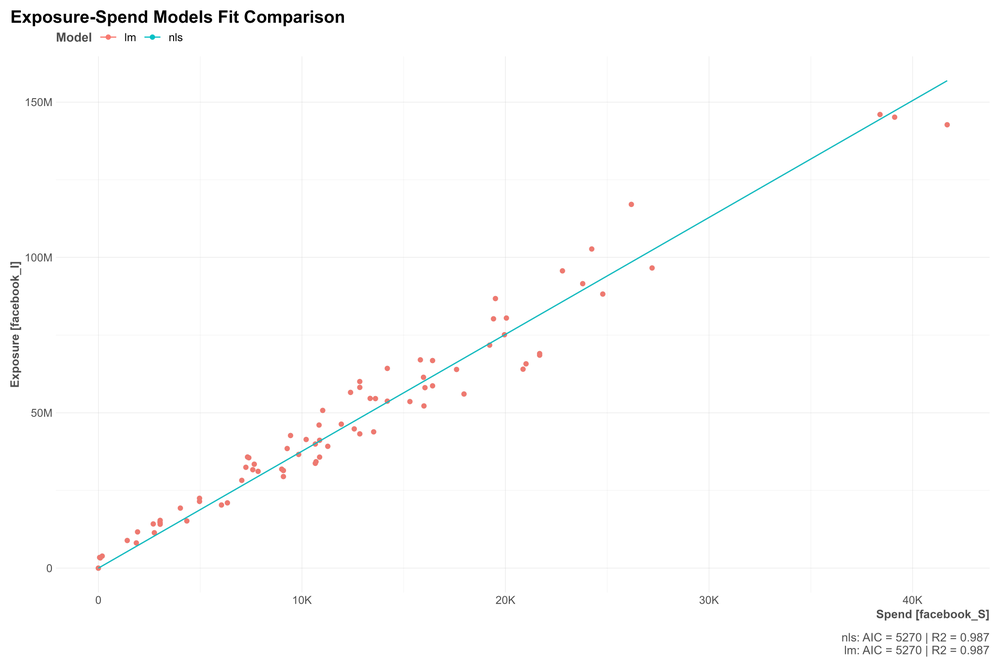

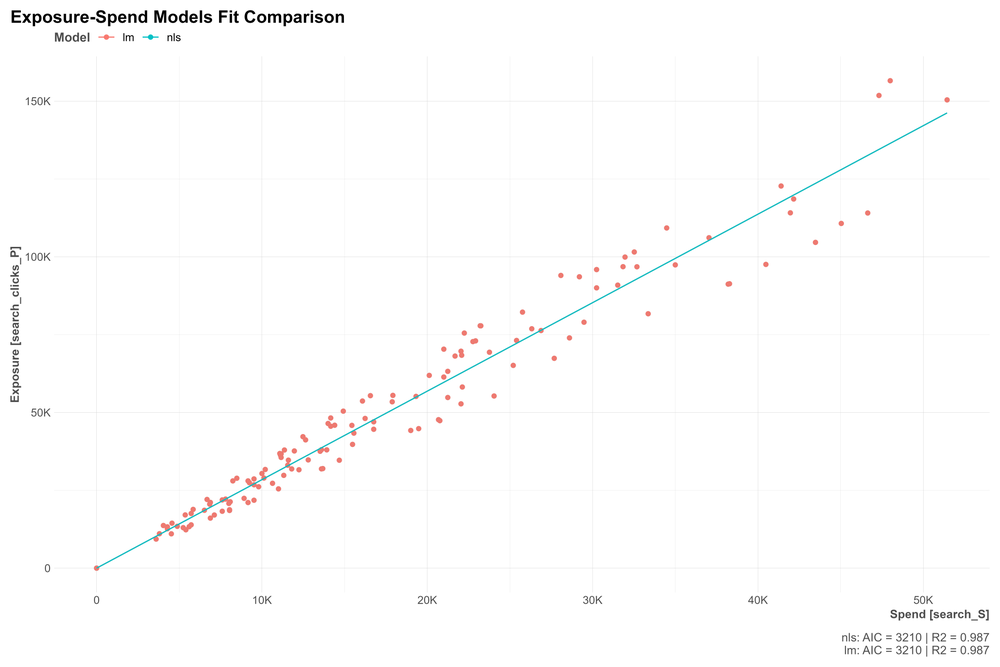

In [16]:
#max_size is deafulted to 1000 x 1500 but can be changed
render_spendexposure(InputJson=InputCollect,max_size=(1000,1500))

## Step 3: Build initial model
Run all trials and iterations.

In [17]:
runArgs = {
    "iterations" : 500, # NULL defaults to (max available - 1)
    "trials" : 1, # 5 recommended for the dummy dataset
    "ts_validation" : True,  # 3-way-split time series for NRMSE validation.
    "add_penalty_factor" : False, # Experimental feature. Use with caution.
}

# Build the payload for the robyn_run()
payload = {
    'InputCollect' : json.dumps(InputCollect), 
    'jsonRunArgs' : json.dumps(runArgs)
}

In [18]:
# Get response
OutputModels = robyn_api('robyn_run',payload=payload)

### Check MOO (multi-objective optimization) convergence plots

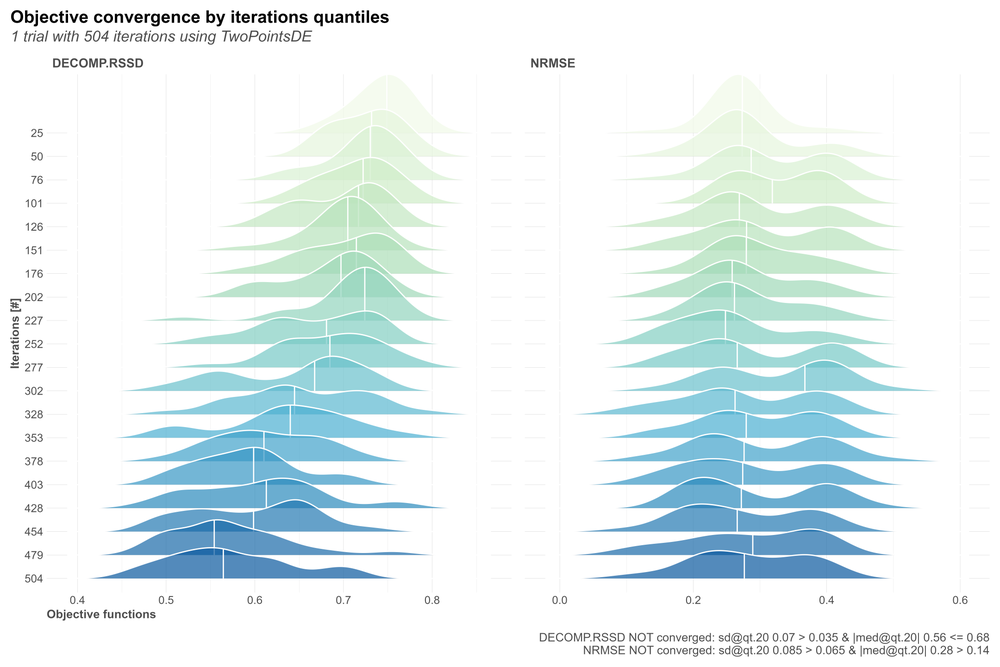

In [19]:
plot_outputgraphs(OutputModels,graphtype='moo_distrb_plot',max_size=(1000, 1500),argumenttype='none')

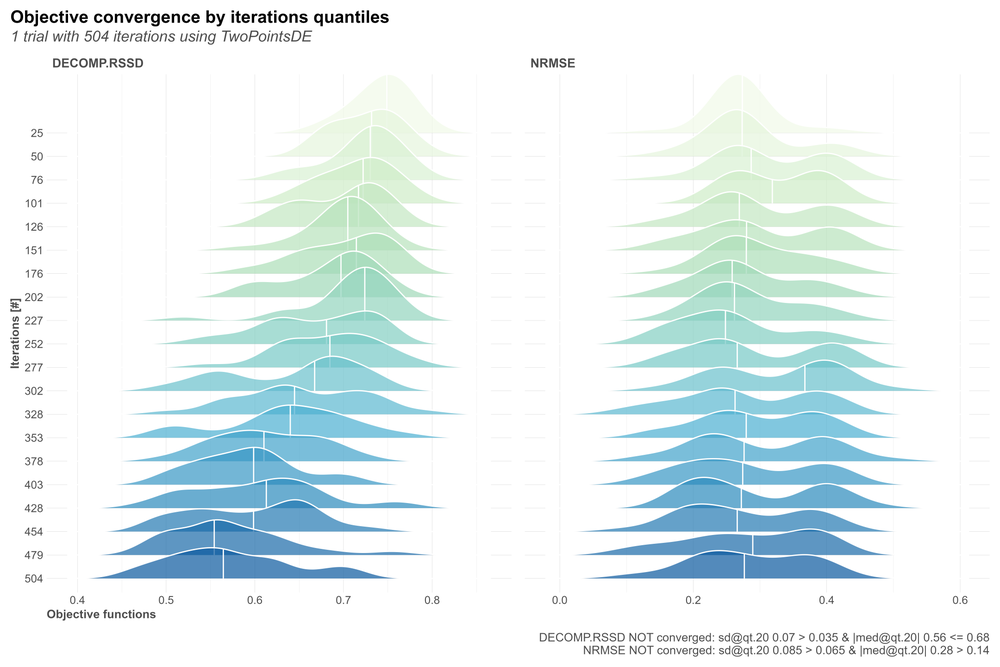

In [20]:
plot_outputgraphs(OutputModels,graphtype='moo_cloud_plot',max_size=(1000, 1500),argumenttype='none')

### Check time-series validation plot (when ts_validation == TRUE)

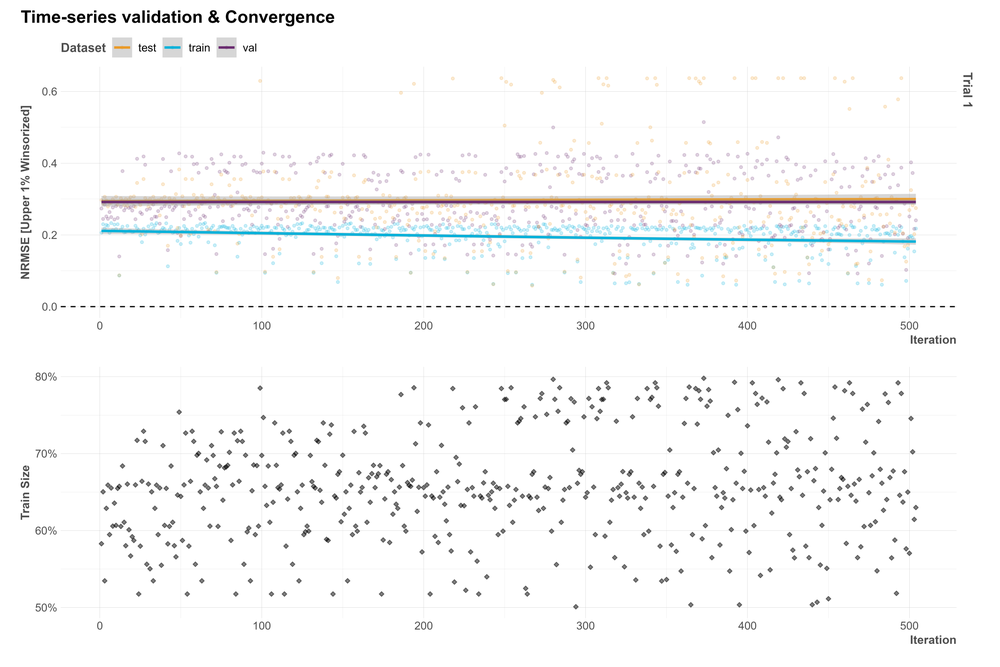

In [21]:
plot_outputgraphs(OutputModels,graphtype='ts_validation_plot',max_size=(1000, 1500),argumenttype='none')

### Calculate Pareto fronts, cluster and export results and plots.

In [22]:
outputsArgs = {
    "pareto_fronts" : 'auto', # automatically pick how many pareto-fronts to fill min_candidates (100)
#     "min_candidates" : 100, # top pareto models for clustering. Default to 100
#     "calibration_constraint" : 0.1, # range [0.01, 0.1] & default at 0.1
    "csv_out" : "pareto", # "pareto", "all", or NULL (for none)
    "clusters" : True, # Set to TRUE to cluster similar models by ROAS.
    "export" : create_files, # this will create files locally
    "plot_folder" : robyn_directory, # path for plots exports and files creation
    "plot_pareto" : create_files # Set to FALSE to deactivate plotting and saving model one-pagers
}

# Build the payload for the robyn_outputs()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputModels' : json.dumps(OutputModels),
    'jsonOutputsArgs' : json.dumps(outputsArgs)
}

In [23]:
# Get response
OutputCollect = robyn_api('robyn_outputs',payload=payload)

In [24]:
for i in OutputCollect['clusters']['models']:
    print(i['solID'])

1_69_7
1_33_6
1_67_7
1_72_2


In [34]:
OutputCollect['allSolutions']

['1_46_3',
 '1_65_3',
 '1_67_6',
 '1_69_7',
 '1_71_4',
 '1_72_1',
 '1_72_2',
 '1_51_7',
 '1_59_6',
 '1_60_4',
 '1_62_7',
 '1_63_4',
 '1_64_6',
 '1_67_1',
 '1_68_6',
 '1_71_6',
 '1_35_3',
 '1_47_3',
 '1_56_6',
 '1_59_4',
 '1_63_7',
 '1_66_2',
 '1_67_2',
 '1_72_5',
 '1_43_7',
 '1_49_5',
 '1_55_6',
 '1_55_7',
 '1_56_1',
 '1_57_5',
 '1_61_1',
 '1_67_7',
 '1_68_3',
 '1_43_6',
 '1_44_7',
 '1_46_7',
 '1_51_5',
 '1_52_6',
 '1_53_3',
 '1_54_1',
 '1_55_3',
 '1_55_4',
 '1_56_2',
 '1_59_5',
 '1_61_7',
 '1_62_6',
 '1_64_5',
 '1_67_4',
 '1_68_7',
 '1_69_3',
 '1_70_4',
 '1_70_5',
 '1_2_5',
 '1_33_6',
 '1_42_5',
 '1_47_4',
 '1_49_7',
 '1_57_1',
 '1_58_5',
 '1_59_3',
 '1_63_2',
 '1_66_1',
 '1_66_3',
 '1_26_6',
 '1_36_7',
 '1_40_5',
 '1_42_3',
 '1_48_4',
 '1_51_2',
 '1_55_5',
 '1_58_4',
 '1_66_6',
 '1_66_7',
 '1_68_4',
 '1_71_3',
 '1_72_3',
 '1_72_7',
 '1_28_7',
 '1_32_1',
 '1_35_5',
 '1_49_6',
 '1_51_3',
 '1_51_4',
 '1_54_3',
 '1_59_7',
 '1_60_2',
 '1_65_4',
 '1_69_1',
 '1_70_2',
 '1_15_4',
 '1_19_6',


#### 4 csv files are exported into the folder for further usage.
- Check schema here: https://github.com/facebookexperimental/Robyn/blob/main/demo/schema.R  
- pareto_hyperparameters.csv, hyperparameters per Pareto output model  
- pareto_aggregated.csv, aggregated decomposition per independent variable of all Pareto output  
- pareto_media_transform_matrix.csv, all media transformation vectors  
- pareto_alldecomp_matrix.csv, all decomposition vectors of independent variables

## Step 4: Select and save the any model

### Compare all model one-pagers and select one that mostly reflects your business reality

In [ ]:
#Load one pagers for top models
load_onepager(top_pareto=True,sol='all',InputJson=InputCollect,OutputJson=OutputCollect,path=robyn_directory)

Fetching one pager for specified solution id
Onepager written to path: C:/Users/ebyjose/RobynOutcomes/1_51_2


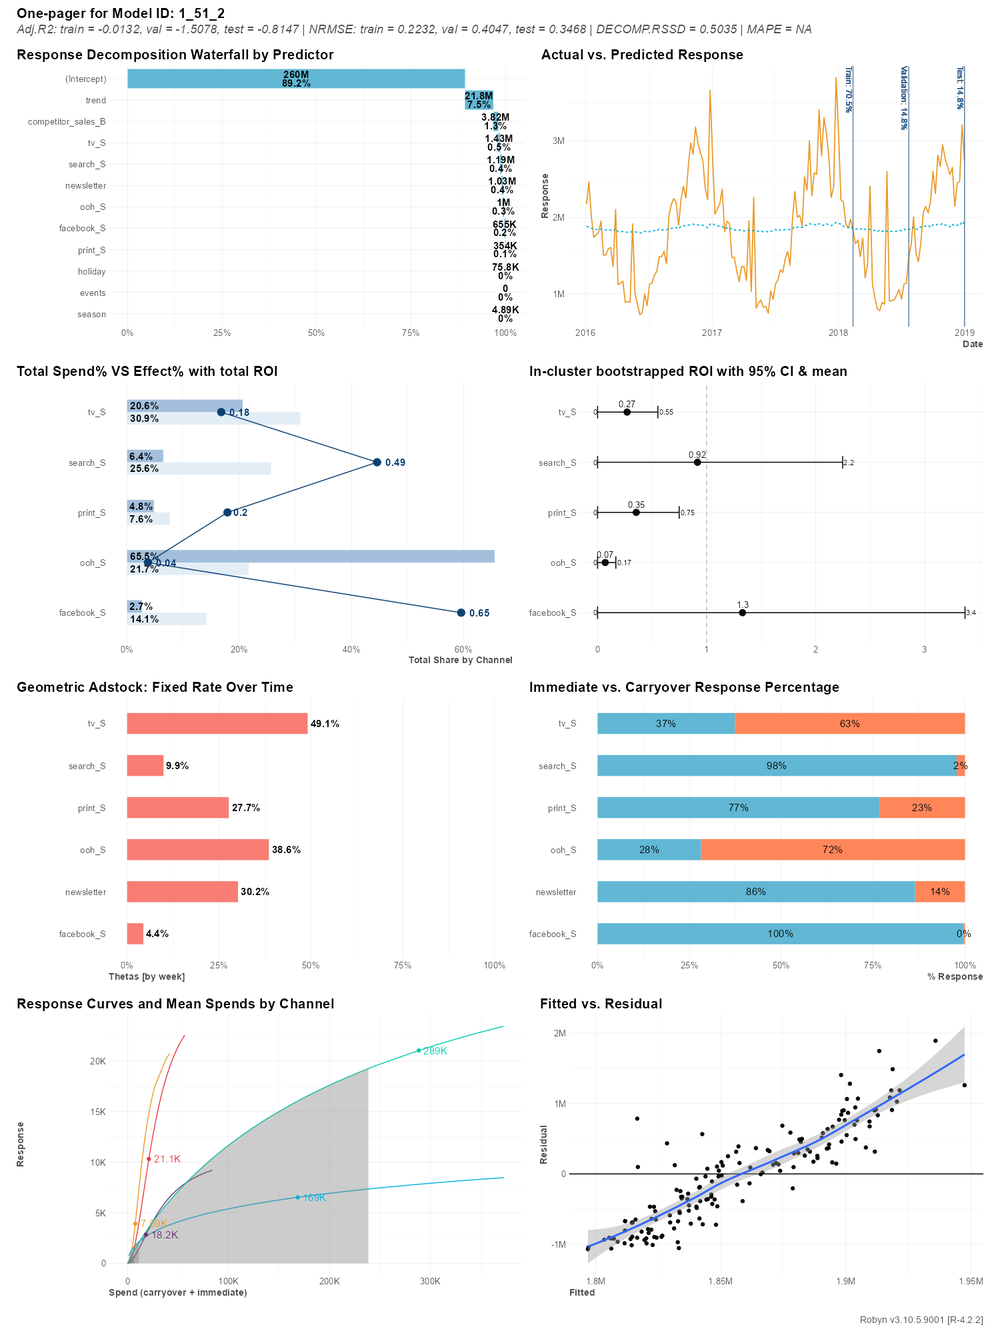

In [35]:
#write one pager to specified location
load_onepager(sol='1_51_2',write=True,InputJson=InputCollect,OutputJson=OutputCollect,path=robyn_directory)

### Write Robyn outcomes

In [38]:
write_robynmodel(sol='1_51_2',path=robyn_directory,InputJson=InputCollect,OutputJson=OutputCollect,OutputModels=OutputModels)

File written to specified path


### To plot any model's one-pager:

Fetching one pager for specified solution id


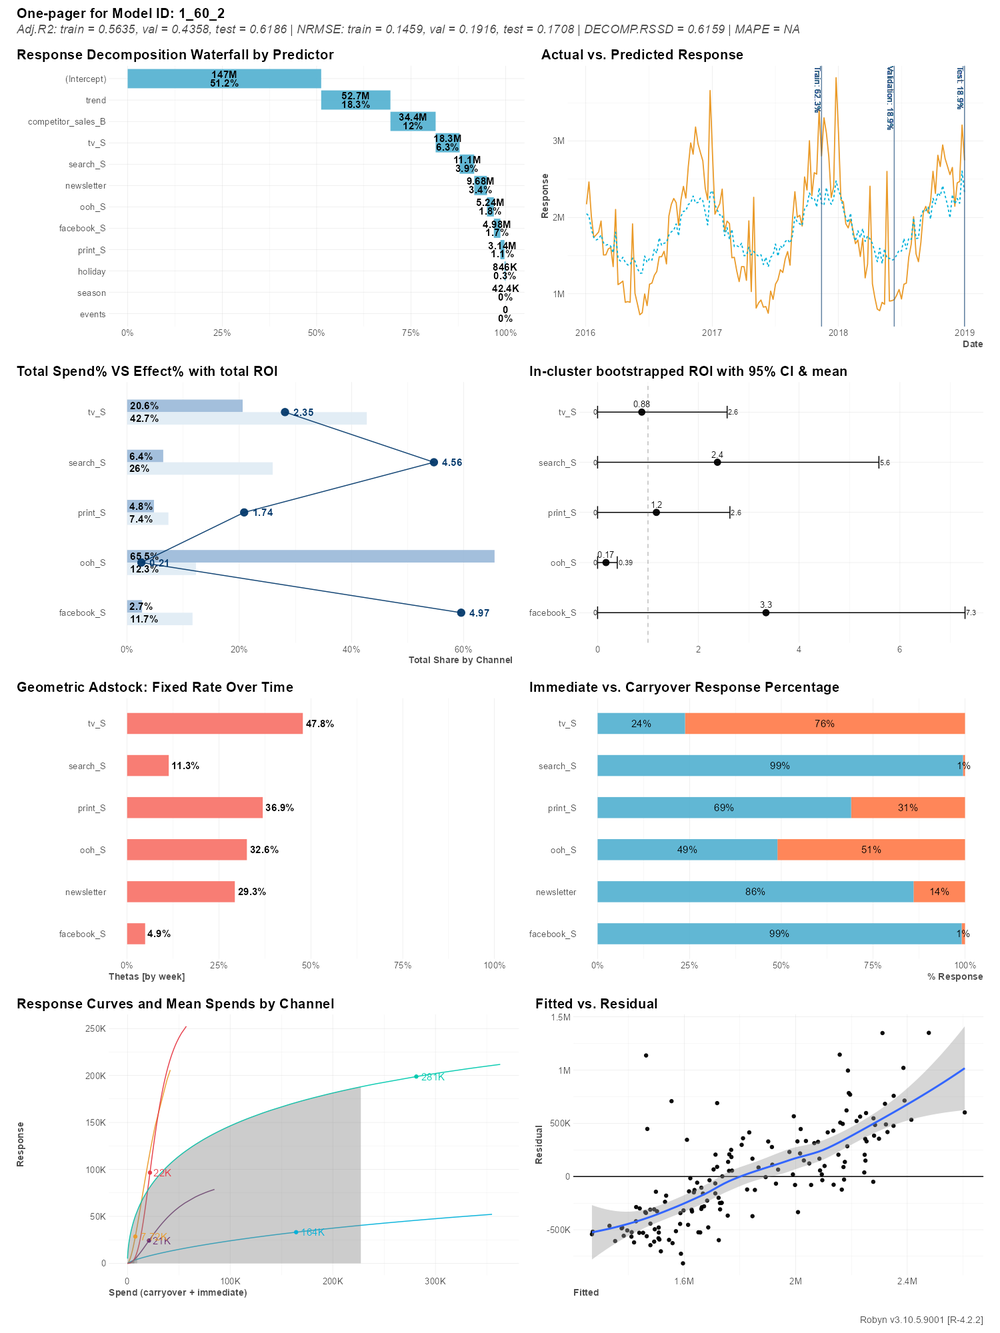

In [39]:
load_onepager(sol='1_60_2',InputJson=InputCollect,OutputJson=OutputCollect,path=robyn_directory)

## Step 5: Get budget allocation based on the selected model above
Budget allocation result requires further validation. Please use this recommendation with caution.  
Don't interpret budget allocation result if selected model above doesn't meet business expectation.

In [40]:
# NOTE: The order of constraints should follow:
InputCollect['paid_media_spends']

['tv_S', 'ooh_S', 'print_S', 'facebook_S', 'search_S']

Scenario "max_response": "What's the max. return given certain spend?"  
Example: max_response defaultsetting: maximize response for latest month

In [41]:
select_model='1_60_2'

allocatorArgs = {
    "select_model" : select_model,
#     "date_range" : None, # Default last month as initial period
#     "total_budget" : None, # When NULL, default is total spend in date_range
    "channel_constr_low" : 0.7,
    "channel_constr_up" : 1.2,
    "channel_constr_multiplier" : 3,
    "scenario" : "max_response"
}

In [42]:
# Build the payload for the robyn_allocator()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputCollect' : json.dumps(OutputCollect),
    "jsonAllocatorArgs": json.dumps(allocatorArgs),
    'dpi' : 100,
    'width' : 15,
    'height' : 15
}

In [43]:
# Get response
allocator = robyn_api('robyn_allocator',payload=payload)

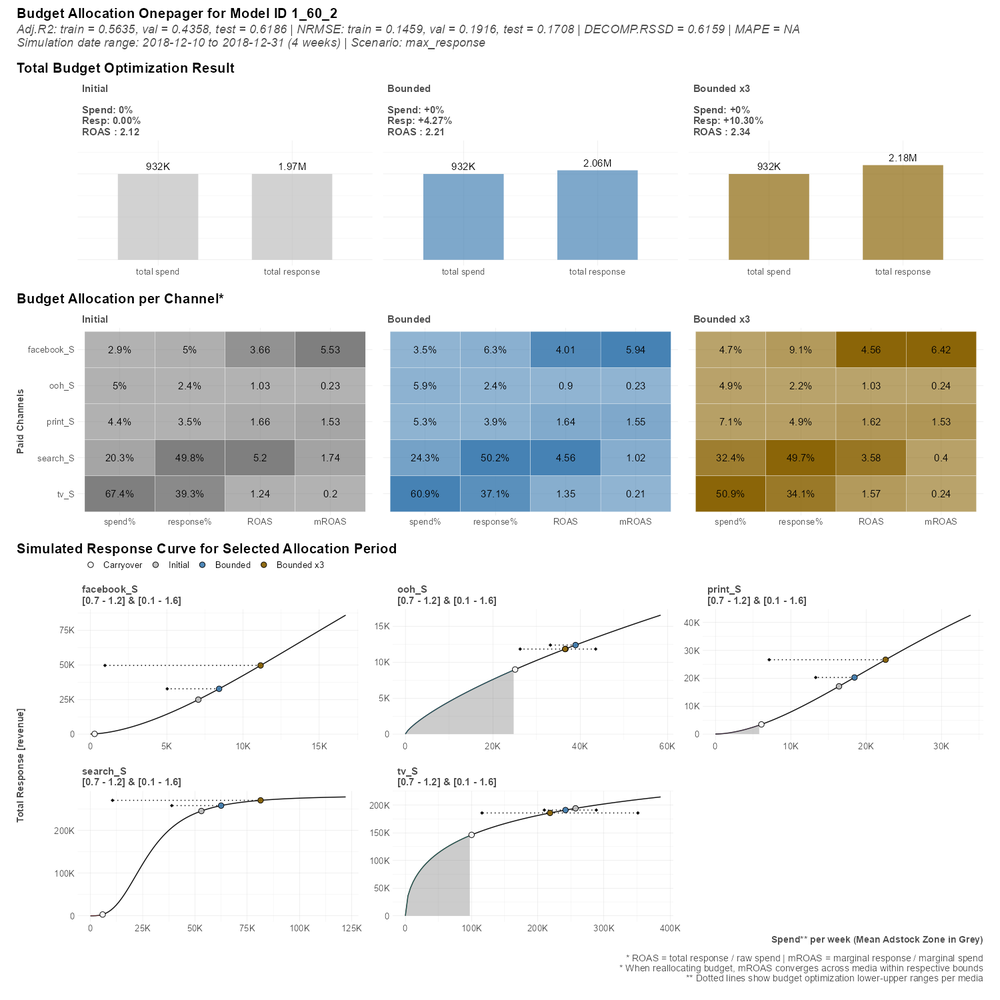

In [44]:
plot_outputgraphs(OutputJson='none',argumenttype=allocator,graphtype='allocator',max_size=(1000, 1500))

## Optional: recreate old models and replicate results
From an exported JSON file (which is created automatically when exporting a model) we can re-create a previously trained model and outputs.  
Note: we need to provide the main dataset and the holidays dataset, which are NOT stored in the JSON file.  

### Re-create InputCollect and OutputCollect by simply using endpoint `robyn_recreate/`

In [46]:
recreateArgs = {
    "json_file" : "C:/Users/ebyjose/RobynOutcomes/RobynModel-1_51_2.json",
    "quiet" : False
}

In [47]:
# Build the payload for the robyn_recreate()
payload = {
    'dt_input' : asSerialisedFeather(dt_simulated_weekly), 
    'dt_holidays' : asSerialisedFeather(dt_prophet_holidays), 
    "jsonRecreateArgs": json.dumps(recreateArgs)
}

In [48]:
# Get response
RobynRecreated = robyn_api('robyn_recreate',payload=payload)

In [50]:
InputCollectX = RobynRecreated['InputCollect']
InputCollectX.keys()

dict_keys(['dt_input', 'dt_holidays', 'dt_mod', 'dt_modRollWind', 'xDecompAggPrev', 'date_var', 'dayInterval', 'intervalType', 'dep_var', 'dep_var_type', 'prophet_vars', 'prophet_signs', 'prophet_country', 'context_vars', 'context_signs', 'paid_media_vars', 'paid_media_signs', 'paid_media_spends', 'paid_media_total', 'mediaVarCount', 'exposure_vars', 'organic_vars', 'organic_signs', 'all_media', 'all_ind_vars', 'factor_vars', 'unused_vars', 'window_start', 'rollingWindowStartWhich', 'window_end', 'rollingWindowEndWhich', 'rollingWindowLength', 'totalObservations', 'refreshAddedStart', 'adstock', 'hyperparameters', 'calibration_input', 'custom_params', 'dt_inputRollWind', 'modNLS', 'version'])

In [51]:
OutputCollectX = RobynRecreated['OutputCollect']
OutputCollectX.keys()

dict_keys(['resultHypParam', 'xDecompAgg', 'mediaVecCollect', 'xDecompVecCollect', 'resultCalibration', 'allSolutions', 'allPareto', 'calibration_constraint', 'OutputModels', 'cores', 'iterations', 'trials', 'intercept_sign', 'nevergrad_algo', 'add_penalty_factor', 'seed', 'UI', 'pareto_fronts', 'hyper_fixed', 'plot_folder', 'hyper_updated', 'selectID'])